In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#import csv file

df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [4]:
#No. of rows and columns

print('Dataset (raw,column):',df.shape)

Dataset (raw,column): (10000, 11)


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

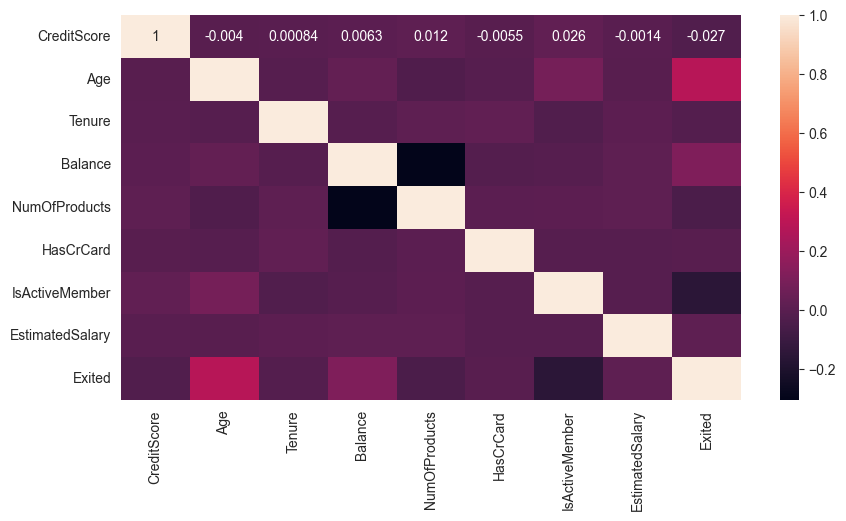

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)

# Analyze Each Feature

Geography

In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Text(0.5, 1.0, 'Geography')

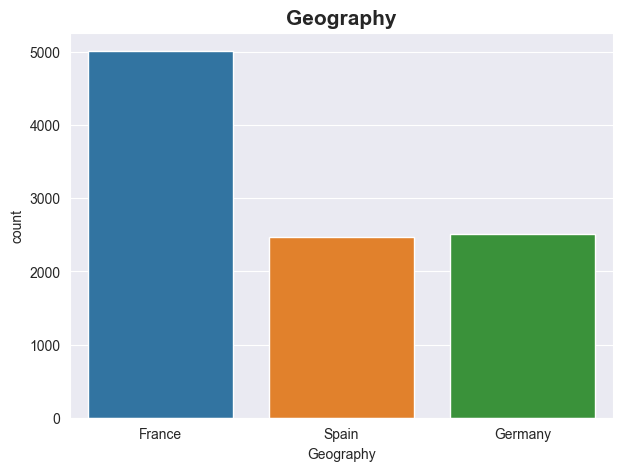

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='Geography',data=df).set_title("Geography",fontsize=15,fontdict={"weight": "bold"})

In [11]:
df.groupby(["Geography","Exited"]).size()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

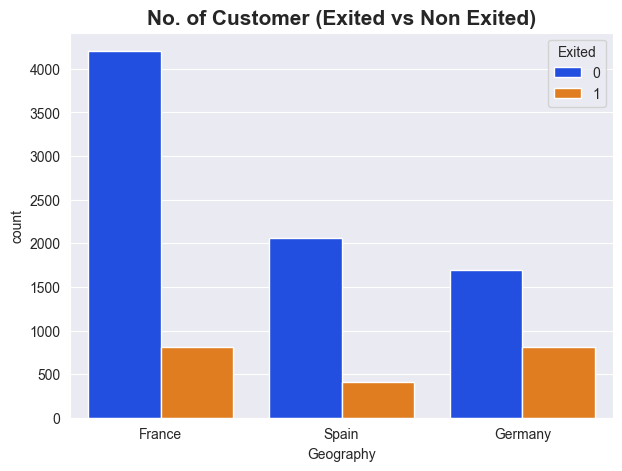

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x="Geography",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Gender

Text(0.5, 1.0, 'Gender')

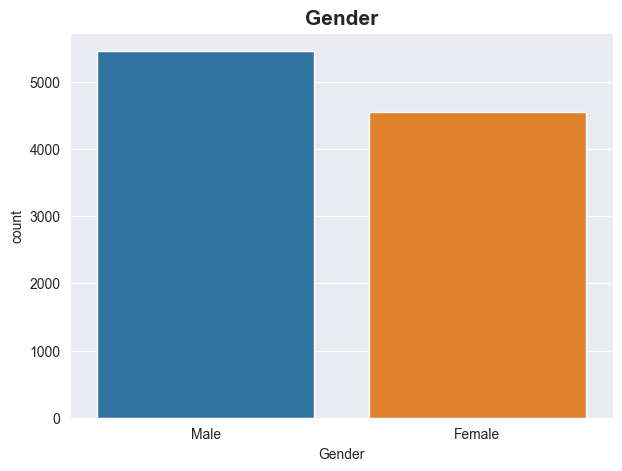

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',order=["Male","Female"],data=df).set_title("Gender",fontsize=15,fontdict={"weight": "bold"})

In [15]:
df.groupby(["Gender","Exited"]).size()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
dtype: int64

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

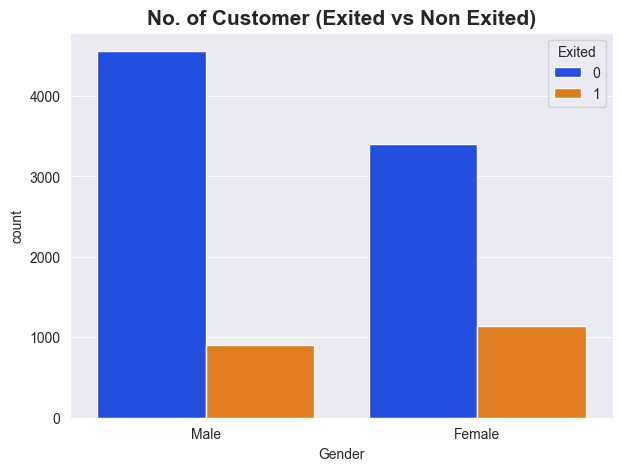

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender",hue="Exited",data=df,palette='bright',order=["Male","Female"]).set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

In [17]:
df.groupby(["Gender","Exited"]).size()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
dtype: int64

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

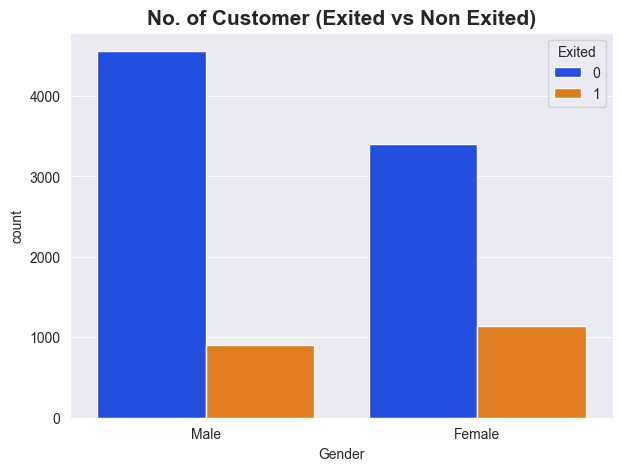

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender",hue="Exited",data=df,palette='bright',order=["Male","Female"]).set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Gender-Geography

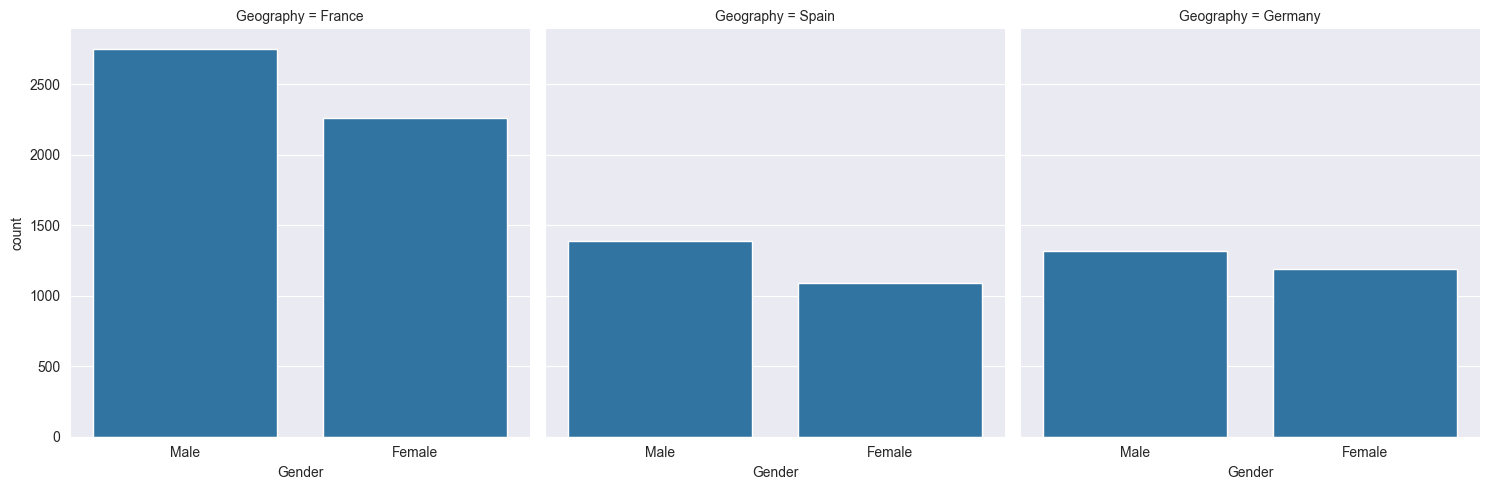

In [20]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",  order=["Male", "Female"])

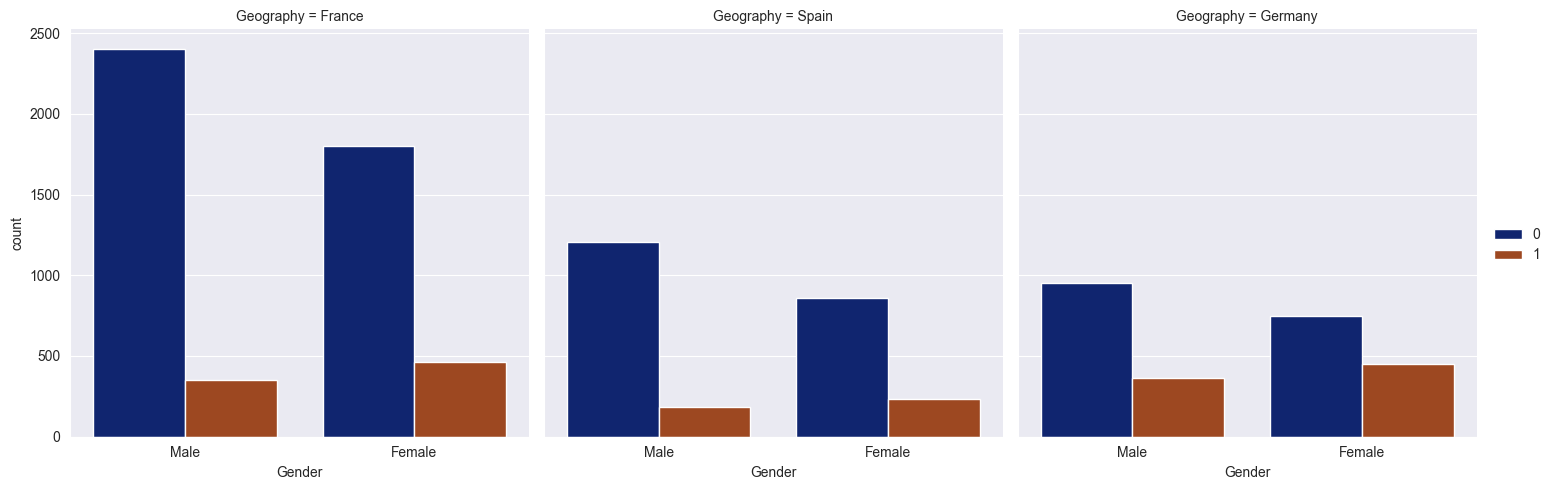

In [21]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",hue="Exited" ,data=df,order=["Male", "Female"],palette="dark")
g.add_legend()  # 0 stands for Not Exited , 1 stands for Exited 

Age

In [22]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

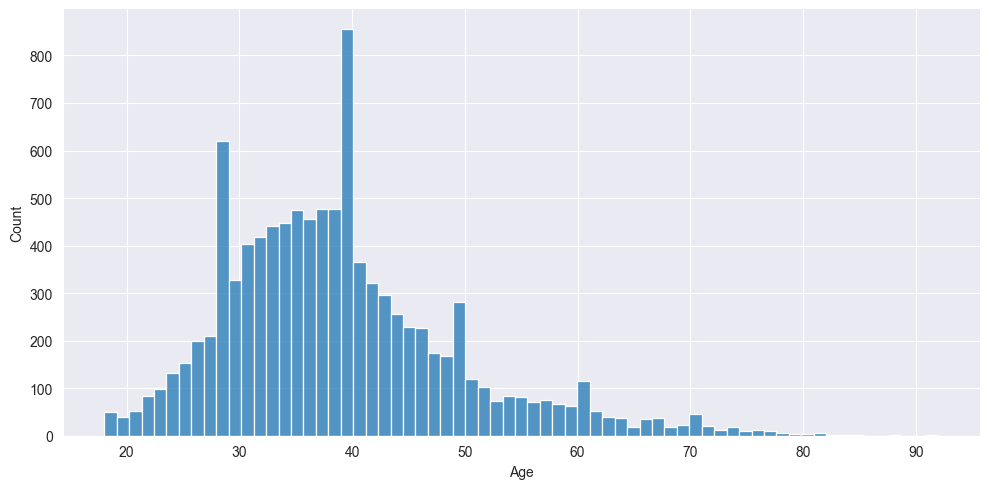

In [23]:
sns.displot(data=df, x="Age",height=5, aspect=2)

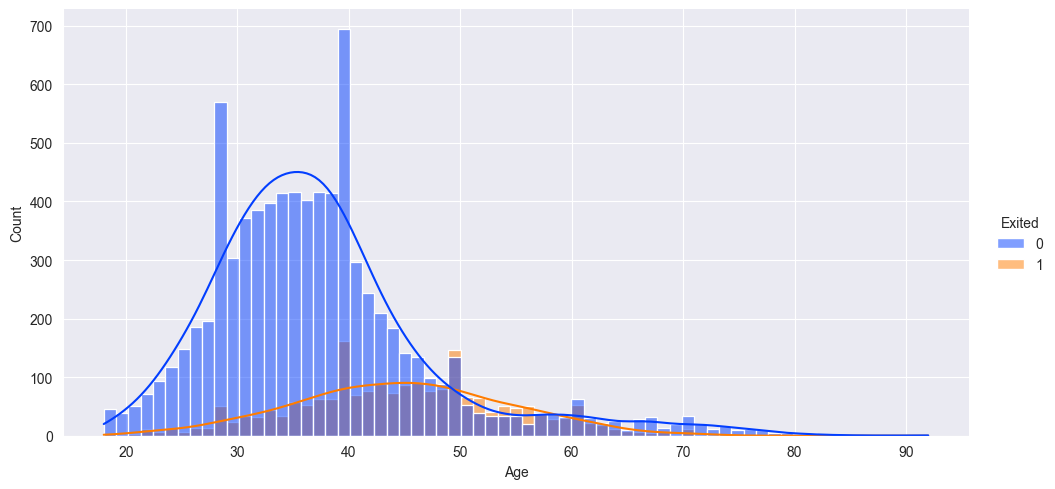

In [24]:
sns.displot(data=df, x="Age",hue="Exited",kind="hist",kde=True,palette="bright",height=5, aspect=2)

## No.of Product

Text(0.5, 1.0, 'No. of Product')

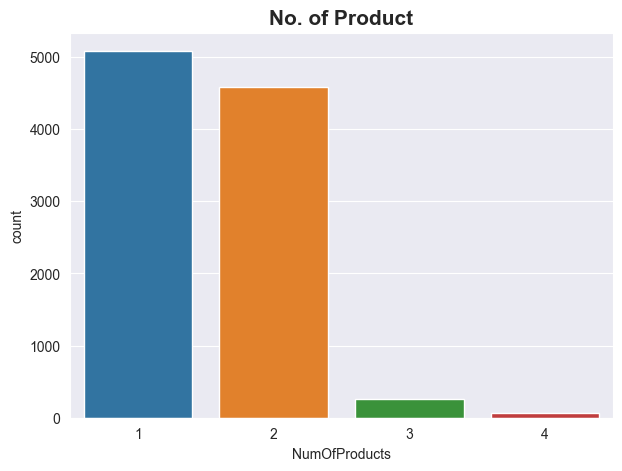

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",data=df).set_title("No. of Product",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

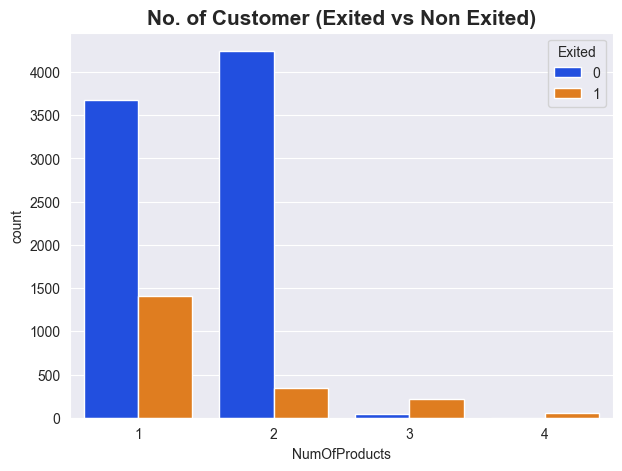

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

Tenure

Text(0.5, 1.0, 'Tenure')

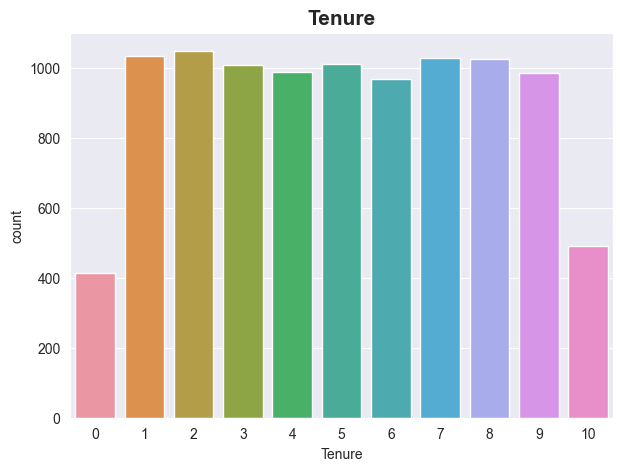

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",data=df).set_title("Tenure",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

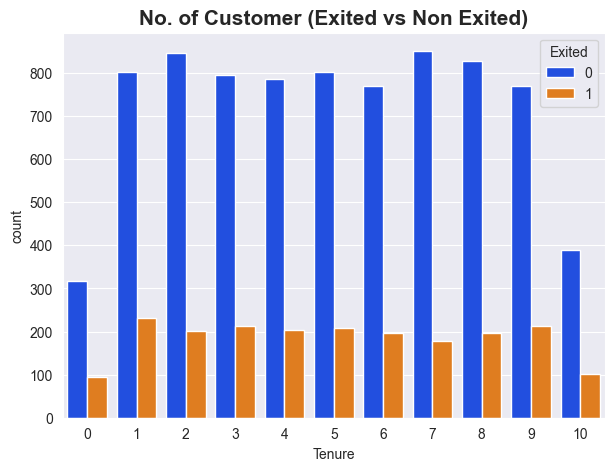

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

Credit Card Holder

Text(0.5, 1.0, 'No.of  Credit Card Holder')

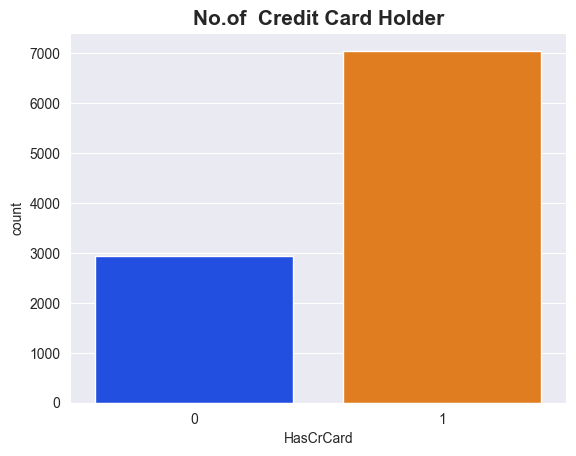

In [31]:
sns.countplot(x="HasCrCard",data=df,palette='bright').set_title("No.of  Credit Card Holder",fontsize=15,fontdict={"weight": "bold"})

In [32]:
df.groupby(["HasCrCard","Gender"]).size()

HasCrCard  Gender
0          Female    1351
           Male      1594
1          Female    3192
           Male      3863
dtype: int64

In [33]:
df.groupby(["HasCrCard","Exited"]).size()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
dtype: int64

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

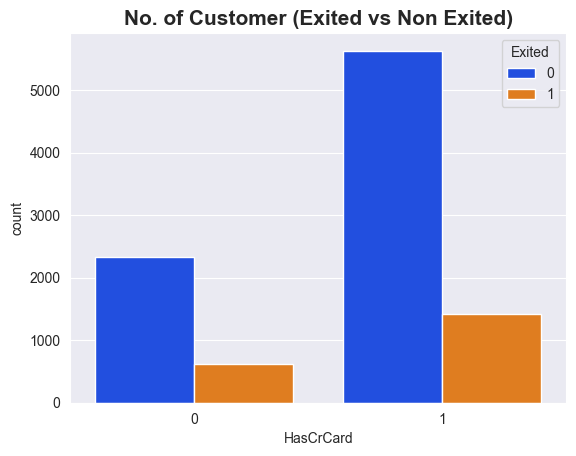

In [34]:
sns.countplot(x="HasCrCard",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'ActiveMember')

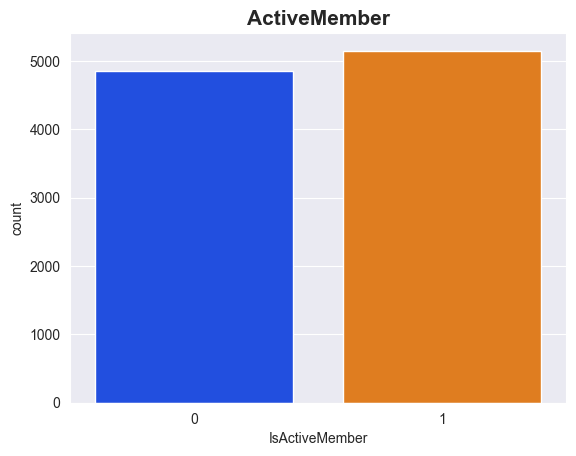

In [35]:
sns.countplot(x="IsActiveMember",data=df,palette='bright').set_title("ActiveMember",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

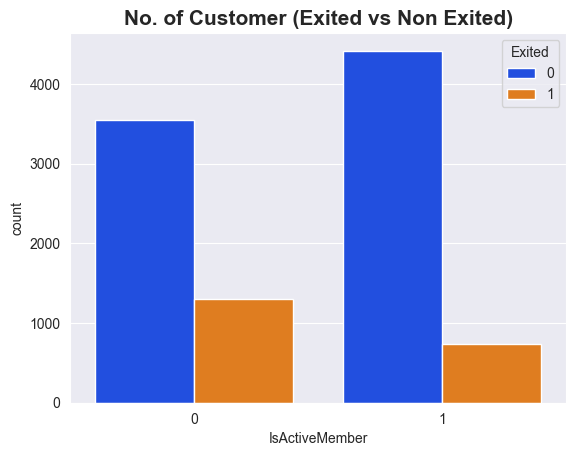

In [36]:
sns.countplot(x="IsActiveMember",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

Credit Score

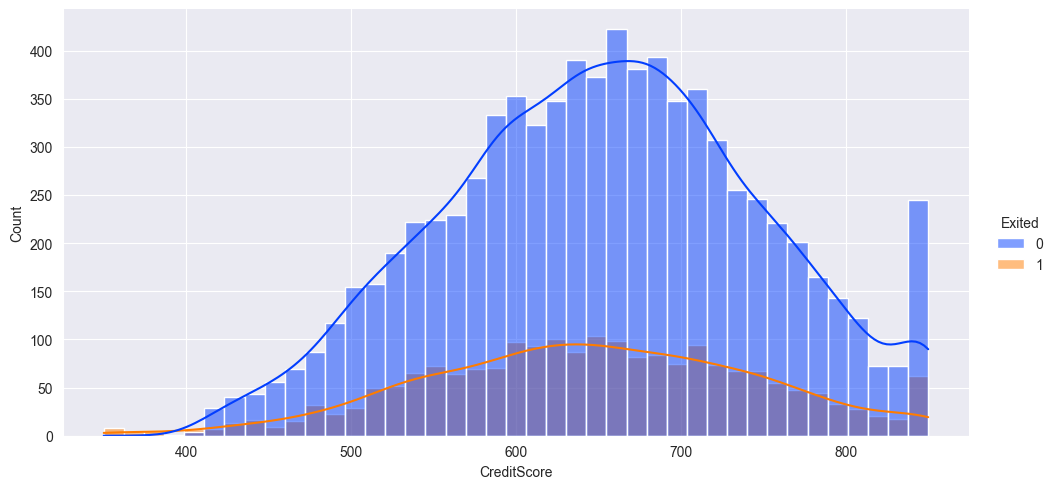

In [37]:
sns.displot(data=df, x="CreditScore",hue="Exited",palette="bright",kind="hist",kde=True,height=5, aspect=2)

Balance

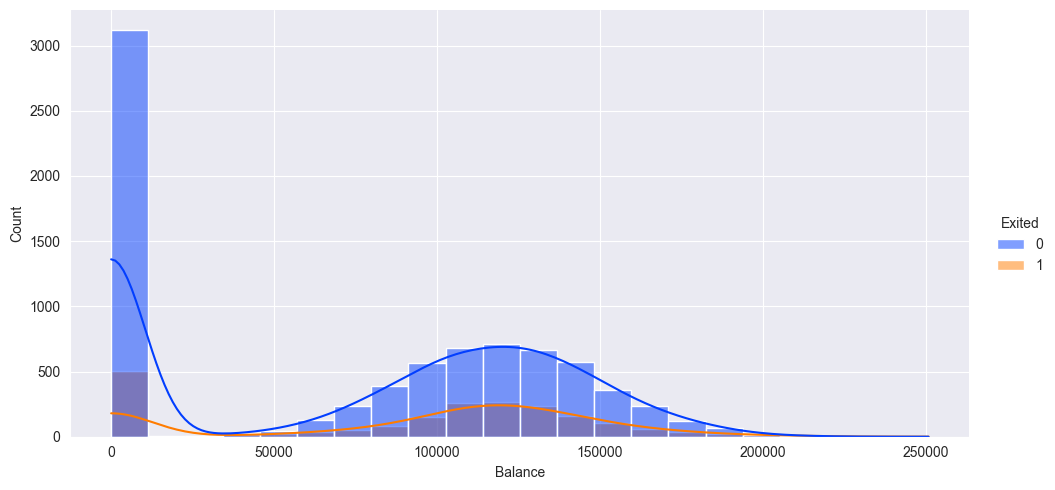

In [38]:
sns.displot(data=df, x="Balance",hue="Exited",kind="hist",kde=True,height=5, aspect=2,palette="bright")

Estimated Salary

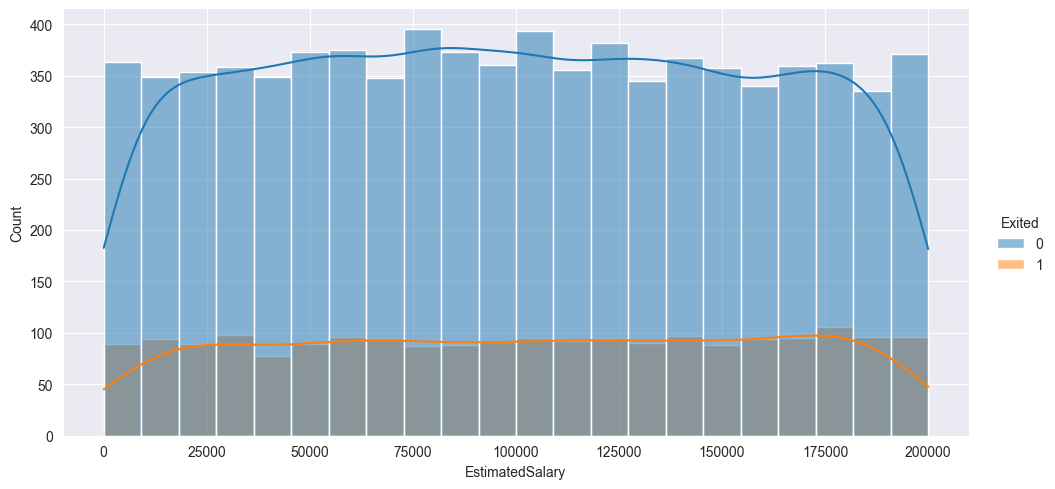

In [39]:
sns.displot(data=df, x="EstimatedSalary",hue="Exited",kind="hist",kde=True,height=5, aspect=2)